In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
PATH = "dataset/transaction_dataset.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### __Remove unmeaningful features__

In [4]:
useless_features = ['Unnamed: 0', 'Index', ' ERC20 avg time between rec 2 tnx']
try:
    df = df.drop(useless_features, axis=1)
except:
    # If kernel restarted and cell is ran,
    # mostlikely already removed the columns.
    useless_features = []
    df = df.drop(useless_features, axis=1)

In [5]:
df.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### __Checking distribution of Positive and Negative classes__

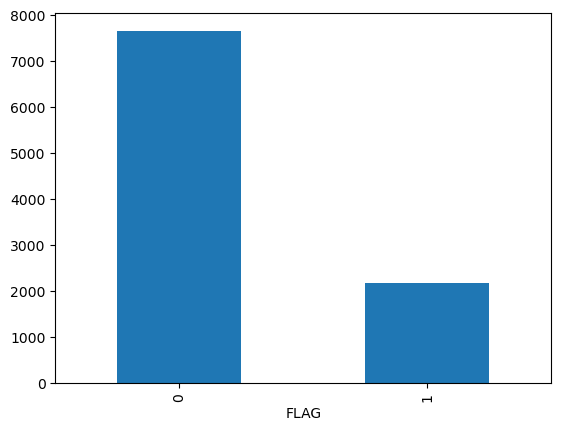

In [6]:
counts = df.groupby("FLAG").size()
counts.plot.bar()
plt.show()

Oof, pretty bias towards negative examples

### __Reformat the columns__
1. Change all column names to lowercase and replace whitespaces with underscores (this is a common practice to avoid errors when working with data)
2. Use abbreviations when appropiate.
3. Keep a consistent naming when applicable.

The first one is easy to do, the last two need some manual inspections.

In [7]:
df_new = df.copy()
df_new.columns = df_new.columns.str.replace(' ', '_').str.lower()

Inspecting and comparing the columns after performing 1.

In [8]:
for idx, (col, col_new) in enumerate(zip(df.columns, df_new.columns)):
    print("Column {}".format(idx))
    print(col)
    print(col_new)
    print("")

Column 0
Address
address

Column 1
FLAG
flag

Column 2
Avg min between sent tnx
avg_min_between_sent_tnx

Column 3
Avg min between received tnx
avg_min_between_received_tnx

Column 4
Time Diff between first and last (Mins)
time_diff_between_first_and_last_(mins)

Column 5
Sent tnx
sent_tnx

Column 6
Received Tnx
received_tnx

Column 7
Number of Created Contracts
number_of_created_contracts

Column 8
Unique Received From Addresses
unique_received_from_addresses

Column 9
Unique Sent To Addresses
unique_sent_to_addresses

Column 10
min value received
min_value_received

Column 11
max value received 
max_value_received_

Column 12
avg val received
avg_val_received

Column 13
min val sent
min_val_sent

Column 14
max val sent
max_val_sent

Column 15
avg val sent
avg_val_sent

Column 16
min value sent to contract
min_value_sent_to_contract

Column 17
max val sent to contract
max_val_sent_to_contract

Column 18
avg value sent to contract
avg_value_sent_to_contract

Column 19
total transaction

### __Manually change some oddly named columns__

- `time_diff_between_first_and_last_(mins)` -> `time_diff_between_first_and_last`
- `total_transactions_(including_tnx_to_create_contract` -> `total_transactions_including_tnx_to_create_contract`
- `erc20_uniq_sent_addr.1` -> `erc20_uniq_sent_addr`
- `flag` -> `labels`
- Some of the columns have a leading underscore (`_`) and some have trailing underscore (`_`), we'll remove this altogether.

In [9]:
# Remove leading underscore
df_new.columns = [col[1:] if col.startswith('_') else col for col in df_new.columns]
# Remove trailing underscore
df_new.columns = [col[:-1] if col.endswith('_') else col for col in df_new.columns]

df_new = df_new.rename(columns={
    'time_diff_between_first_and_last_(mins)': 'time_diff_between_first_and_last',
    'total_transactions_(including_tnx_to_create_contract': 'total_transactions_including_tnx_to_create_contract',
    # 'erc20_uniq_sent_addr.1': 'erc20_uniq_sent_addr',
    'flag': 'labels'
})

In [10]:
# Use the modified df.
df = df_new
df.head()

,address,labels,avg_min_between_sent_tnx,avg_min_between_received_tnx,time_diff_between_first_and_last,sent_tnx,received_tnx,number_of_created_contracts,unique_received_from_addresses,unique_sent_to_addresses,...,erc20_min_val_sent,erc20_max_val_sent,erc20_avg_val_sent,erc20_min_val_sent_contract,erc20_max_val_sent_contract,erc20_avg_val_sent_contract,erc20_uniq_sent_token_name,erc20_uniq_rec_token_name,erc20_most_sent_token_type,erc20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


There are several more issues with our column namings:
- Some features' names are too long. We'll need to shorten this.
- Some features use "value" and some use "val". We'll need to stick with one convention.
- Instead of "between", let's use "btwn" (that's 3 letters shorter) for every features containing the word "between".
- There is a column that uses "transactions" instead of "tnx" like the other columns. We'll change this.
- Instead of "address" (or "addresses"), let's use "addr" for brevity.
- Instead of "tnxs", let's keep a consistent naming: use "tnx" instead.
There are some feature names that are too long:

In [11]:
df = df.rename(columns=lambda c: c.replace("value", "val"))
df = df.rename(columns=lambda c: c.replace("between", "btwn"))
df = df.rename(columns=lambda c: c.replace("transactions", "tnx"))
df = df.rename(columns=lambda c: c.replace("tnxs", "tnx"))
# Some more complex cases, use regular expression to handle them.
df.columns = df.columns.str.replace('(.*)(address)(es)?$', r'\1addr', regex=True)
df.columns = df.columns.str.replace('(.*)(contract)(s)?$', r'\1contract', regex=True)
df.columns = df.columns.str.replace('(.*)(receive)(d)?$', r'\1rec', regex=True)
df.columns = df.columns.str.replace('uniq', 'unique')

for col in df.columns:
    print(col)

addr
labels
avg_min_btwn_sent_tnx
avg_min_btwn_received_tnx
time_diff_btwn_first_and_last
sent_tnx
received_tnx
number_of_created_contract
uniqueue_received_from_addr
uniqueue_sent_to_addr
min_val_rec
max_val_rec
avg_val_rec
min_val_sent
max_val_sent
avg_val_sent
min_val_sent_to_contract
max_val_sent_to_contract
avg_val_sent_to_contract
total_tnx_including_tnx_to_create_contract
total_ether_sent
total_ether_rec
total_ether_sent_contract
total_ether_balance
total_erc20_tnx
erc20_total_ether_rec
erc20_total_ether_sent
erc20_total_ether_sent_contract
erc20_unique_sent_addr
erc20_unique_rec_addr
erc20_unique_sent_addr.1
erc20_unique_rec_contract_addr
erc20_avg_time_btwn_sent_tnx
erc20_avg_time_btwn_rec_tnx
erc20_avg_time_btwn_contract_tnx
erc20_min_val_rec
erc20_max_val_rec
erc20_avg_val_rec
erc20_min_val_sent
erc20_max_val_sent
erc20_avg_val_sent
erc20_min_val_sent_contract
erc20_max_val_sent_contract
erc20_avg_val_sent_contract
erc20_unique_sent_token_name
erc20_unique_rec_token_name
erc

### __Explaining some confusing features__

So there are some features (columns) with interesting names, for example: what is the difference between column `erc20_avg_time_btwn_rec_tnx` and `erc20_avg_time_btwn_rec_2_tnx`? Why does these columns only have `9012` values in common? What are (or where are) the other `829` values? We have `9841` unique addresses. Some features have less than `9841` datapoints. For example, these features only have `9012` datapoints:

- `total_erc20_tnx`
- `erc20_total_ether_rec`
- `erc20_total_ether_sent`
- `erc20_total_ether_sent_contract`
- `erc20_uniq_sent_addr`
- `erc20_uniq_rec_addr`
- `erc20_uniq_sent_addr.1`
- and more...

`erc20_most_sent_token_type` only has `9000` datapoints, whereas `erc20_most_rec_token_type` only has `8990` datapoints.

Apparently, our dataset has some missing datapoints. In Machine Learning, there are many ways to deal with missing data.

One more thing, I do not know the difference between the feature `erc20_uniq_sent_addr` and `erc20_uniq_sent_addr.1`. If you run `sum(df["erc20_uniq_sent_addr.1"] != df["erc20_uniq_sent_addr"])`, you'll get `2402` as the output, meaning we the differ in `2402` datapoints, which is a lot! We can choose to disregard one of them until we find out what each of them represent. After all, there are only so many features that matter in ML.

We can check for missing datapoints like so:

In [12]:
for c in df.columns:
    # True if c has missing datapoints, false otherwise.
    print(df[c].isnull().any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


For now, we'll do two things to handle these issues: 1. We will generate a dataset `data_with` and `data_without`. The former has `erc20_uniq_sent_addr.1` as one of its features, while the latter doesn't. 2. For feature `f` with missing datapoints, these missing datapoints will be filled the mean of `f`.

In [13]:
# Fill missing datapoints with mean of the features.

# Dealing with numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Dealing with non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna(df[non_numeric_cols].mode().iloc[0]) # Get first mode value

### __The following is our final altered, modified dataset that we will be using for the project, along with their descriptions__

In [14]:
# Get 2 dataframes with and without `erc20_unique_sent_addr.1`.
df_with = df.drop("erc20_unique_sent_addr.1", axis=1)
df_without = df

In [15]:
data = df_without.values
data_with = df_with.values

In [16]:
d1 = df_without.columns.get_loc("labels")
d2 = df_with.columns.get_loc("labels")

data, labels = data[:, np.arange(data.shape[1]) != d1], data[:, d1]
data_with, labels_with = data_with[:, np.arange(data_with.shape[1]) != d2], data_with[:, d2]

In [17]:
data.shape

(9841, 47)

In [18]:
labels.shape

(9841,)

In [19]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [20]:
data_with.shape

(9841, 46)

In [21]:
labels_with.shape

(9841,)

In [22]:
labels_with

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [24]:
np.save('data/data.npy', data)
np.save('data/labels.npy', labels)

In [25]:
np.save('data/data_with.npy', data_with)
np.save('data/labels_with.npy', labels_with)